In [79]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

generationScores = []
bests = []
bestVecs = []

# NOTE TO SELF you messed up the user distribution so they are DIFFERENT between runs
# Please only use the original run 0s and redo the rest as time permits (aka never)
#with open('test.rec.txt', 'r') as f:
with open('out/stats-v1-PSO-128p-r0-5u-5.00km-op_nm-1000it-e-500.txt', 'r') as f:
  for i in tqdm(range(5000)):
    line = f.readline()
    if not line or line == '':
      print('FIN')
      break
    
    words = line.split(':')
    
    if 'final' in words[0]:
      print('THE END', words)
      break
    
    magic, nSamples, best = words
    
    
    
    scores = [float(v) for v in f.readline().split(',')]
    generationScores.append(scores)
    bests.append(float(best))
    
    for idxSample in range(int(nSamples)):
      score = float(f.readline())
      vec = f.readline()
      # Whatever
      if idxSample == 0: bestVecs.append(vec)
            
print(bests[-1])

THE END ['PNMfinal', '192722.23971342621613\n']

22.23971342621613


In [80]:
bestVecs[-1]

'6510.4987,0.5813,0.2626,0.018,0.6084,1.2641,7.1667,1791.1467,0.0645,4.6397,4.7387,1739.6676,45.0418,4.7132,4.8514,4.6998,-29.809,-1755.7305,3.1488,4.9443,5.2971,-1777.1392,-48.9651,1.5844,4.5353,4.7396,13.4313,1836.751,-0.0326,4.6466,4.7782,1832.1002,-44.0569,4.7,4.9144,4.4826,-21.8742,-1794.7352,3.1243,4.7942,5.3479,-1778.225,-1.3645,1.5314,5.0176,5.2668,-46.9004,1838.7547,0.012,5.0446,5.0467,1825.1528,11.7014,4.7287,4.8909,5.2559,18.8412,-1847.5769,3.1148,4.955,4.7122,-1790.8877,-8.5449,1.5405,5.1228,4.8273,13.9897,1843.8217,0.0019,4.8901,5.514,1783.8494,39.3381,4.7217,4.7983,4.761,9.1145,-1776.6172,3.1489,4.8754,4.6962,-1817.2462,14.589,1.5485,5.3441,5.2473,43.6929,1800.6784,-0.0462,4.9375,5.1011,1767.5024,43.2524,4.6693,5.1763,4.6001,-3.0499,-1780.1242,3.141,4.6409,4.9194,-1804.6308,38.8207,1.5852,4.9993,5.3193,91.5558,1755.9925,-0.0352,5.0509,5.0832,1835.7861,-11.0169,4.6681,4.7826,4.8935,54.5606,-1847.5143,3.1306,4.8804,4.5374,-1844.8081,-11.4753,1.5561,5.2869,5.3823,-9.074,1851

<IPython.core.display.Javascript object>


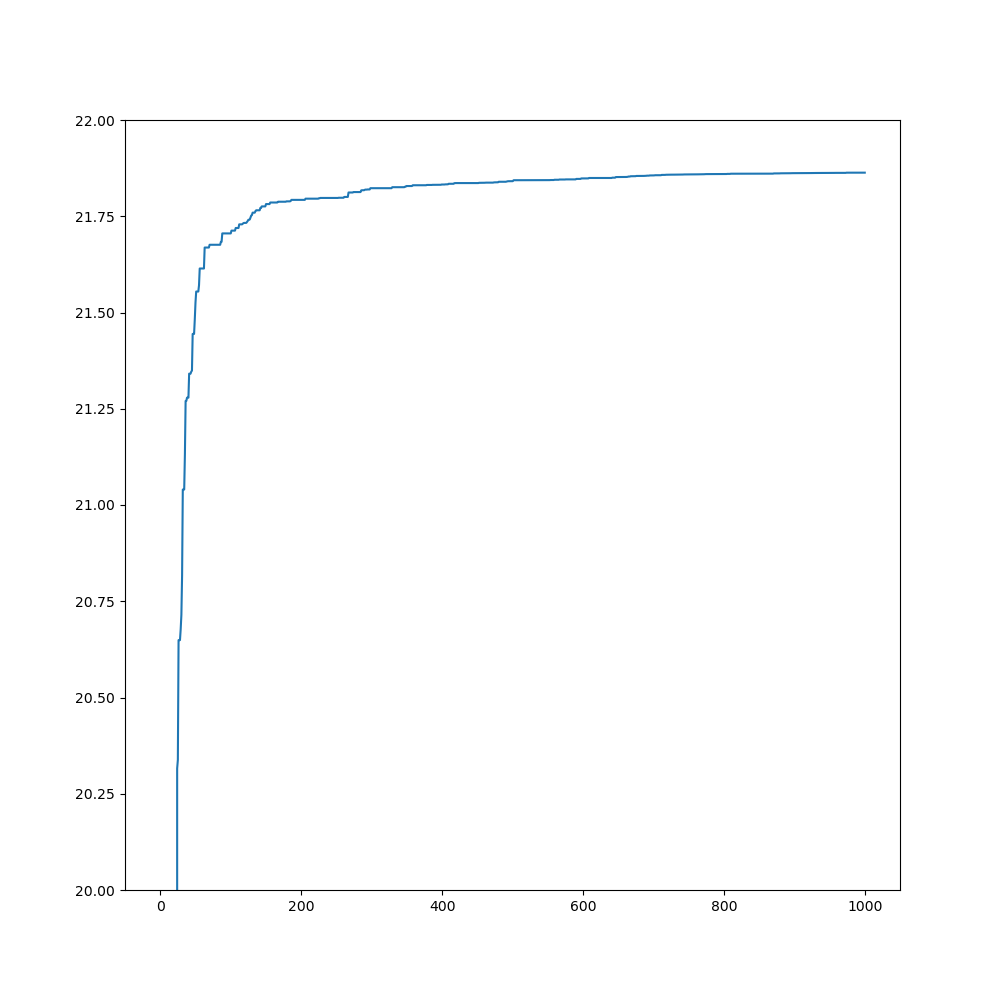

In [50]:
from math import ceil, floor
fig, ax = plt.subplots(figsize=(10, 10))
bests = np.array(bests)
bests.dtype
ax.set_ylim(20, ceil(bests.max()))
ax.plot(bests)

<IPython.core.display.Javascript object>


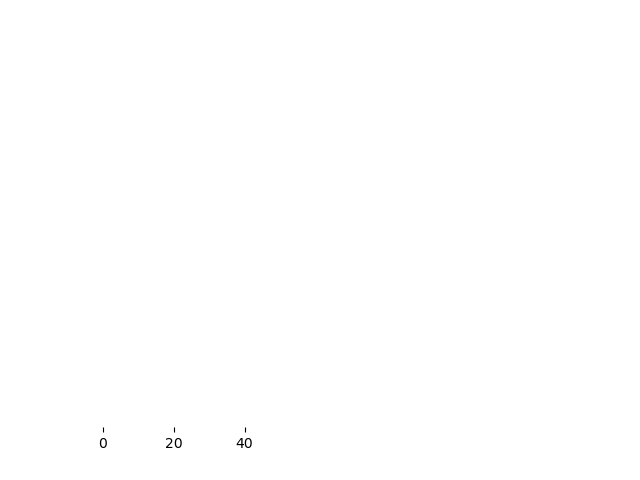

KeyboardInterrupt: 

In [51]:
%matplotlib notebook
fig, ax = plt.subplots()
curves = []
import time
ax.set_ylim(16, 30)
for i in tqdm(range(0, len(generationScores), 1)):
  for curve in curves:
    curve.set_alpha(curve.get_alpha() * 0.9)
  curves.append(plt.plot(generationScores[i], alpha = 1)[0])
  fig.canvas.draw()
  time.sleep(0.1)

In [3]:
bestVecs[-1]

'-1270.9199,-438.497,995.1797,0.2985,5.0918,5.3072,1327.9676,554.121,1124.5643,0.3385,5.2384,5.4341,1443.1138,-458.1494,1113.8335,3.0328,5.2981,5.204,-1144.7201,540.0801,1239.2829,2.9343,5.0981,5.1984,-1313.2212,-484.422,1236.1208,0.2948,5.2651,5.3973,1413.8873,482.3284,1355.2475,0.3291,5.8685,5.1564,1368.4674,-477.6616,1352.9479,3.014,5.4108,4.4108,-1290.6142,450.9219,1474.4406,2.8994,5.2402,5.2213,-1288.2052,-466.2551,1474.0165,0.2009,5.2426,10.5126,1382.6869,525.8373,1597.1784,0.3002,5.2713,5.0844,1338.4435,-456.7413,1596.0315,2.9132,5.0483,5.2108,-1476.1167,510.0615,1713.135,2.908,5.1101,5.327,-1301.8459,-447.7927,1713.8739,0.3054,5.2284,5.2942,1397.4259,466.9193,1831.014,0.3022,5.3458,5.4387,1357.4143,-437.8426,1830.1469,2.9434,5.1801,5.1095,-1428.9421,205.8564,1951.5403,2.9299,5.2508,5.2557,-1325.0459,-422.8787,1948.5643,0.3698,5.0548,5.3355,1370.5444,1442.8763,2073.1997,0.2421,5.0567,9.9846,1336.3781,-459.8861,2069.0687,2.9404,5.1488,5.0632,-1436.0439,509.0153,2190.2695,2.9438,5

In [3]:
from thesis.ThesisCraft import craft
from thesis.Flight import Flight
from thesis.optimize.functions import (
  SplineyFitnessHelper, batteryReward, throughputReward, throughputPenalty,
  energyPenalty, gravityReward, radiusPenalty, altitudePenalty, energyPenalty,
  speedPenalty, alphaPenalty
)
from thesis.EvalHelper import Judge
from thesis.Scenario import Scenario
scene = Scenario()
import random

random.seed(0)
np.random.seed(random.randint(0,99999999))

scene.addRandomGroundUsersUniformCircular(5, r = 5 * 1000)
judge = Judge(scene, craft)


times = pd.date_range(start = '2020-11-28T09', end = '2020-11-29T09', freq='10S', tz='America/Detroit').to_series()
helper = SplineyFitnessHelper(judge, craft, times, expr = [
  throughputReward() / 1e6L / len(scene.users),
  #batteryReward(),
  #gravityReward() * 0.5L,
  # Stay inside our region
  radiusPenalty(2000) * 1e-6L,
  altitudePenalty(900, 12000),
  # Don't lose energy
  energyPenalty(0, gravityCoeff = 0),
  # Keep inside the domain where our model works
  alphaPenalty(), speedPenalty(7, 25)
], desiredDuration = 24*3600)
trajBuild = helper.getTrajBuilder()
vec = [float(v) for v in bestVecs[0].split(',')]
traj, alphas = trajBuild(vec)
#traj.render() + scene.render(size=100000)
helper.getFitness(trajBuilder=trajBuild, debug=True)(vec)

'(((((((TR<85403140.47927897>/1000000.0)/5)+(RP<-0.0>*1e-06))+AP<-0.0>)+EP<0>)+AP<-0.0>)+VP<-0.0>)'

[5.1801,
 5.3007,
 5.1994,
 5.4309,
 5.2802,
 5.2137,
 5.2926,
 5.1896,
 5.1622,
 5.3945,
 5.3623,
 5.1411,
 5.4514,
 5.3079,
 5.2031,
 5.2191,
 5.2387,
 9.5576,
 5.2722,
 5.1115,
 5.0307,
 5.214,
 5.1199,
 5.2757,
 5.2292,
 5.3749,
 5.3618,
 5.4394,
 5.1608,
 5.1189,
 5.2598,
 5.2869,
 5.1586,
 5.2883,
 5.1424,
 6.6558,
 5.0941,
 5.087,
 5.1694,
 5.1791,
 5.3762,
 5.2387,
 5.3654,
 5.6182,
 4.8297,
 5.152,
 5.15,
 5.2348,
 4.2354,
 5.4112,
 5.2905,
 5.1959,
 5.1322,
 5.2003,
 4.973,
 5.0669,
 5.174,
 5.2392,
 5.6748,
 5.4036,
 5.3272,
 5.2839,
 5.2114,
 5.1769,
 5.118,
 5.2041,
 5.3459,
 5.2114,
 5.2991,
 5.1676,
 5.849,
 5.3476,
 4.9757,
 5.3506,
 5.2563,
 5.3524,
 5.1873,
 4.792,
 5.2366,
 5.3323,
 5.1021,
 4.6387,
 5.1481,
 5.202,
 5.7535,
 5.3859,
 5.2574,
 5.1227,
 5.202,
 5.3966,
 5.2334,
 4.9972,
 5.1548,
 5.8675,
 5.1266,
 5.2843,
 5.5314,
 5.1728,
 5.3757,
 5.0206,
 4.9672,
 5.2691,
 5.164,
 5.1623,
 5.4955,
 5.2244,
 5.5897,
 4.9832,
 4.8287,
 4.9399,
 5.3142,
 4.5816,
 5.03

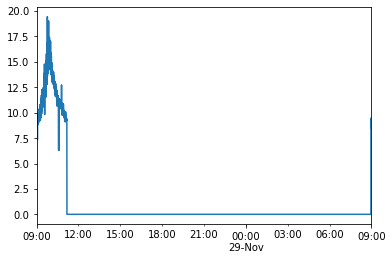

In [30]:
flight=Flight(craft, traj, alphas)
stats = judge.flightStats(flight, times=times, initial_charge=0.1)
stats['poses'].v.plot()
flight.cycleTime
alphas